In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Chicago_Crime_2022.csv')

In [10]:
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13217488,JG432603,01/01/2022 12:00:00 AM,002XX E CHICAGO AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,HOSPITAL BUILDING / GROUNDS,False,True,...,2.0,8,17,NaN,NaN,2022,09/21/2023 03:42:06 PM,NaN,NaN,NaN
1,13221894,JG437481,01/01/2022 12:00:00 AM,005XX N AVERS AVE,1195,DECEPTIVE PRACTICE,FINANCIAL EXPLOITATION OF AN ELDERLY OR DISABL...,RESIDENCE,False,False,...,37.0,23,11,NaN,NaN,2022,09/25/2023 03:42:47 PM,NaN,NaN,NaN
2,13140498,JG340603,01/01/2022 12:00:00 AM,035XX N RETA AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,44.0,6,02,NaN,NaN,2022,09/30/2023 03:42:17 PM,NaN,NaN,NaN
3,13126333,JG323739,01/01/2022 12:00:00 AM,019XX W MAYPOLE AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,...,27.0,28,17,NaN,NaN,2022,10/05/2023 03:41:55 PM,NaN,NaN,NaN
4,13241195,JG455750,01/01/2022 12:00:00 AM,002XX N KOSTNER AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,...,28.0,26,02,NaN,NaN,2022,10/13/2023 03:41:35 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239128,13168154,JG373652,01/01/2023 12:00:00 AM,004XX N CENTRAL AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,...,37.0,25,02,1138961.0,1902443.0,2023,08/19/2023 03:40:26 PM,41.888422,-87.765144,"(41.888421661, -87.765143593)"
239129,13058468,JG242943,01/01/2023 12:00:00 AM,018XX W 77TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,17.0,71,14,1165521.0,1853622.0,2023,08/19/2023 03:40:26 PM,41.753927,-87.668992,"(41.753927498, -87.668991774)"
239130,13081104,JG270400,01/01/2023 12:00:00 AM,027XX S INDIANA AVE,1120,DECEPTIVE PRACTICE,FORGERY,APARTMENT,False,True,...,4.0,35,10,1178044.0,1886556.0,2023,08/19/2023 03:40:26 PM,41.844027,-87.622101,"(41.844026941, -87.622100808)"
239131,13151601,JG354119,01/01/2023 12:00:00 AM,063XX S MAPLEWOOD AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,16.0,66,06,1160465.0,1862440.0,2023,08/19/2023 03:40:26 PM,41.778231,-87.687278,"(41.778231017, -87.687277678)"


In [11]:
from datetime import datetime

# Convert the 'date' column to a Pandas datetime object
data['date'] = pd.to_datetime(data['Date'])

# Extract the month into a new column
data['month'] = data['date'].dt.month

# Extract the time into a new column in 24-hour format
data['time_24h'] = data['date'].dt.strftime('%H:%M:%S')

# print(data)

print(data)

              ID Case Number                    Date                  Block  \
0       13217488    JG432603  01/01/2022 12:00:00 AM    002XX E CHICAGO AVE   
1       13221894    JG437481  01/01/2022 12:00:00 AM      005XX N AVERS AVE   
2       13140498    JG340603  01/01/2022 12:00:00 AM       035XX N RETA AVE   
3       13126333    JG323739  01/01/2022 12:00:00 AM    019XX W MAYPOLE AVE   
4       13241195    JG455750  01/01/2022 12:00:00 AM    002XX N KOSTNER AVE   
...          ...         ...                     ...                    ...   
239128  13168154    JG373652  01/01/2023 12:00:00 AM    004XX N CENTRAL AVE   
239129  13058468    JG242943  01/01/2023 12:00:00 AM        018XX W 77TH ST   
239130  13081104    JG270400  01/01/2023 12:00:00 AM    027XX S INDIANA AVE   
239131  13151601    JG354119  01/01/2023 12:00:00 AM  063XX S MAPLEWOOD AVE   
239132  13090171    JG280795  01/01/2023 12:00:00 AM      034XX W HIRSCH ST   

        IUCR                Primary Type  \
0      

In [5]:
# Define a list of unique crime types
crime_types = data['Primary Type'].unique()

# Create a figure for the violin plot
plt.figure(figsize=(14, 8))

# Analyze temporal patterns for each crime type by month
for i, crime_type in enumerate(crime_types):
    # Filter data for the specific crime type
    crime_data = data[data['Primary Type'] == crime_type]
    
    # Group data by month, crime type, and hour and count occurrences
    hourly_counts = crime_data.groupby(['month', 'Primary Type', 'hour']).size().reset_index(name='count')
    
    # Create a violin plot for each crime type
    plt.subplot(2, 4, i + 1)
    sns.violinplot(data=hourly_counts, x='month', y='count', inner='quart', palette='muted')
    plt.title(f"{crime_type}")
    plt.xlabel("Month")
    plt.ylabel("Number of Incidents")

plt.tight_layout()
plt.show()

KeyError: 'hour'

<Figure size 1008x576 with 0 Axes>

# Theft data

<ipython-input-14-d67c63b7b0b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['Date'] = pd.to_datetime(theft_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-14-d67c63b7b0b1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['Month'] = theft_data['Date'].dt.strftime('%b')
<ipython-input-14-d67c63b7b0b1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

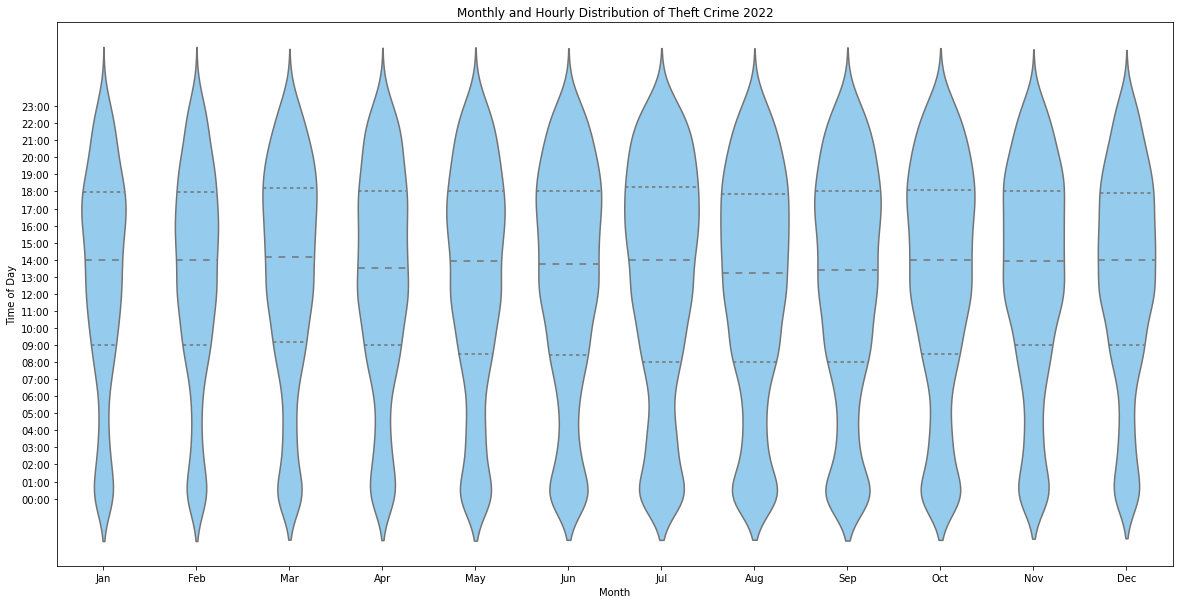

In [14]:
# Filter data for the 'Theft' crime type
theft_data = data[data['Primary Type'] == 'THEFT']
theft_data

# Convert the 'Date' column to a datetime object
theft_data['Date'] = pd.to_datetime(theft_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
theft_data['Month'] = theft_data['Date'].dt.strftime('%b')
theft_data['Time'] = theft_data['Date'].dt.hour * 60 + theft_data['Date'].dt.minute



# Map months to seasons
season_mapping = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Winter',
    'Apr': 'Winter', 'May': 'Summer', 'Jun': 'Summer',
    'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Summer',
    'Oct': 'Summer', 'Nov': 'Winter', 'Dec': 'Winter'
}
theft_data['Season'] = theft_data['Month'].map(season_mapping)

# Define the order of months for proper alignment
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# color = ["lightblue", "lightpink"]
# palette = sns.set_palette(sns.color_palette(color))
colors = {
    'Winter': 'lightblue',
    'Summer': 'lightpink',
}


# Create the violin plot
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=theft_data, x='Month', y='Time', color="lightskyblue", 
                    inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Theft Crime 2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])


# Move the legend to the right
# plt.legend(title="Season", loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

# MOTOR VEHICLE THEFT

<ipython-input-15-bd0c9f03da21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['Date'] = pd.to_datetime(theft_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-15-bd0c9f03da21>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['Month'] = theft_data['Date'].dt.strftime('%b')
<ipython-input-15-bd0c9f03da21>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

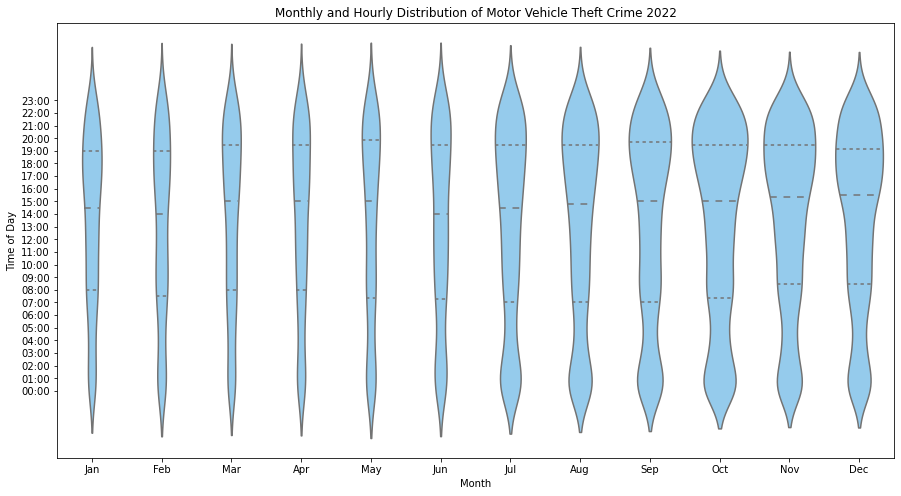

In [15]:
theft_data = data[data['Primary Type'] == 'MOTOR VEHICLE THEFT']

# Convert the 'Date' column to a datetime object
theft_data['Date'] = pd.to_datetime(theft_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
theft_data['Month'] = theft_data['Date'].dt.strftime('%b')
theft_data['Time'] = theft_data['Date'].dt.hour * 60 + theft_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=theft_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Motor Vehicle Theft Crime 2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# HOMICIDE data

<ipython-input-16-228f3de14e38>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOMICIDE_data['Date'] = pd.to_datetime(HOMICIDE_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-16-228f3de14e38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOMICIDE_data['Month'] = HOMICIDE_data['Date'].dt.strftime('%b')
<ipython-input-16-228f3de14e38>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

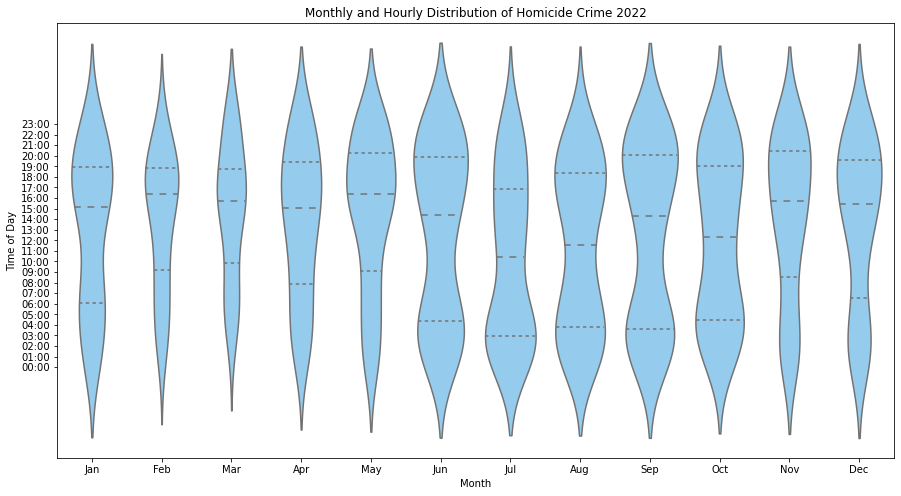

In [16]:
# Filter data for the 'HOMICIDE' crime type
HOMICIDE_data = data[data['Primary Type'] == 'HOMICIDE']


# Convert the 'Date' column to a datetime object
HOMICIDE_data['Date'] = pd.to_datetime(HOMICIDE_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
HOMICIDE_data['Month'] = HOMICIDE_data['Date'].dt.strftime('%b')
HOMICIDE_data['Time'] = HOMICIDE_data['Date'].dt.hour * 60 + HOMICIDE_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=HOMICIDE_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Homicide Crime 2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# CRIMINAL SEXUAL ASSAULT  and SEX OFFENSE

<ipython-input-17-6a8439091bca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-17-6a8439091bca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-17-6a8439091bca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

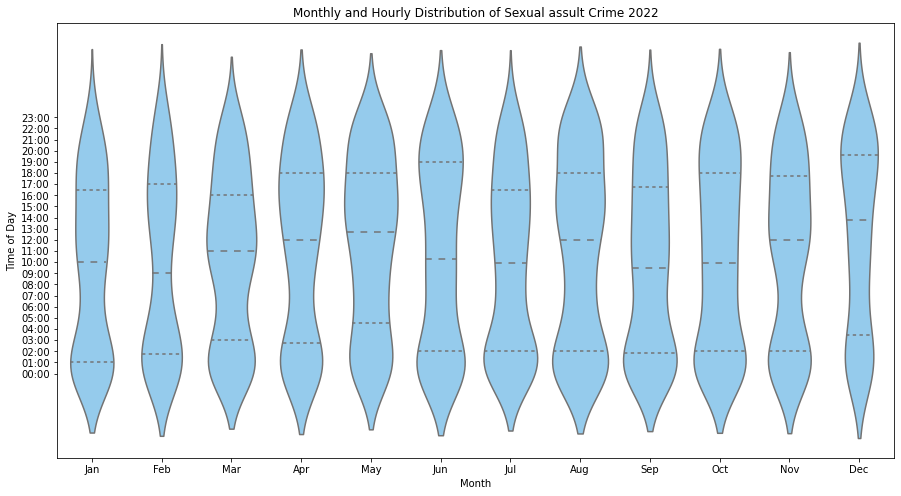

In [17]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'CRIMINAL SEXUAL ASSAULT') | (data['Primary Type'] == 'SEX OFFENSE')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Sexual assult Crime 2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# ROBBERY

<ipython-input-19-5d4a8102430a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-19-5d4a8102430a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-19-5d4a8102430a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

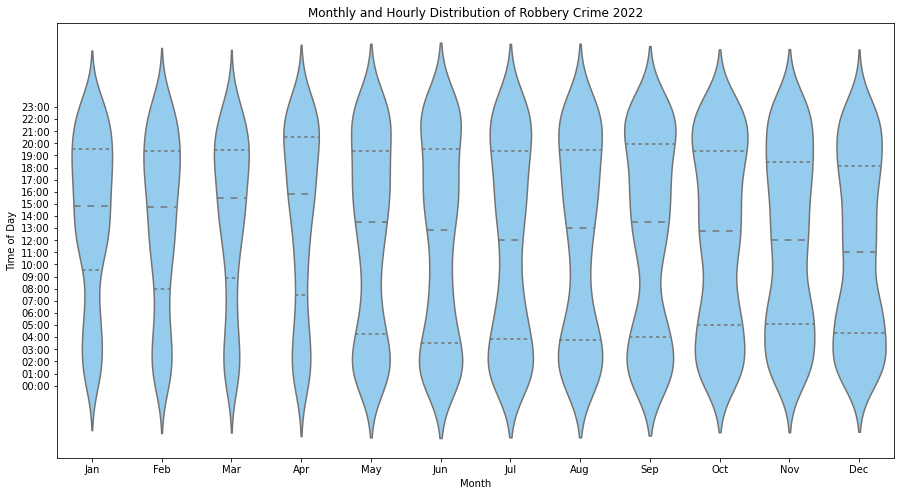

In [19]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'ROBBERY')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Robbery Crime 2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# BATTERY

<ipython-input-20-ed0075fcf05e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-20-ed0075fcf05e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-20-ed0075fcf05e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

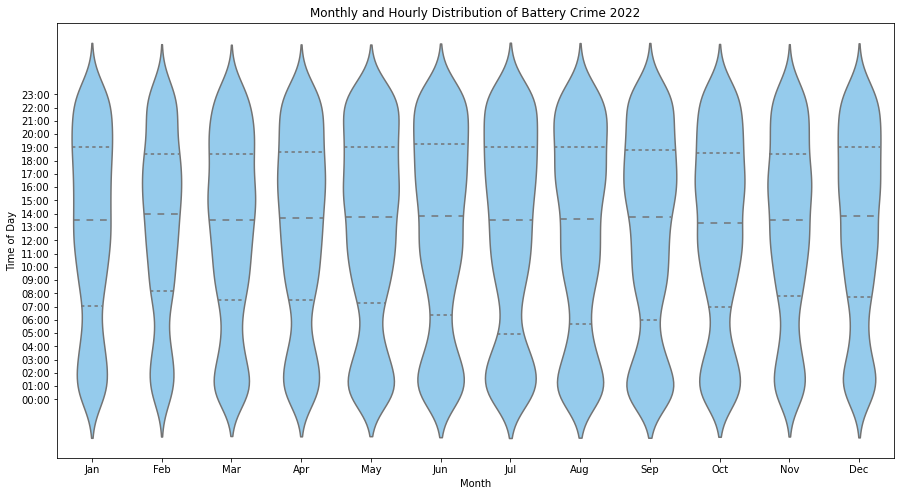

In [20]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'BATTERY')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Battery Crime 2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# BURGLARY

<ipython-input-21-cc6acd8ad2ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-21-cc6acd8ad2ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-21-cc6acd8ad2ec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

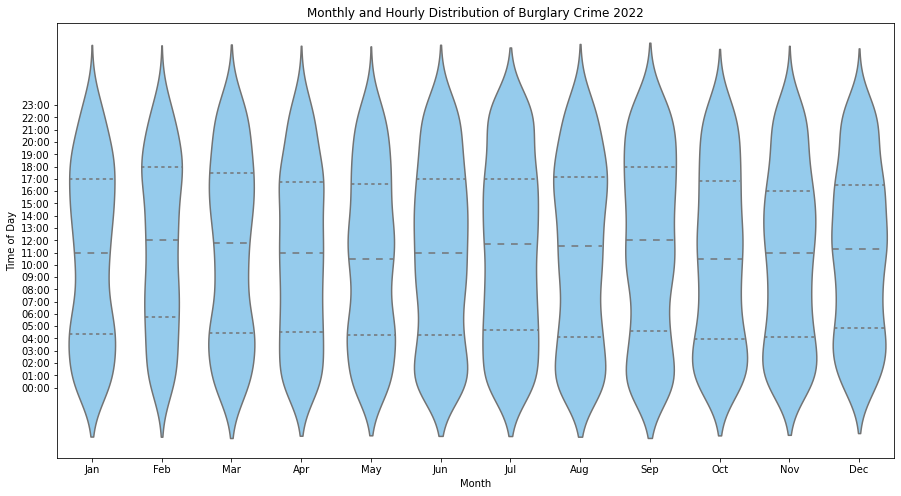

In [21]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'BURGLARY')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Burglary Crime 2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()


# Create the swarmplot
# plt.figure(figsize=(15, 8))
# sns.swarmplot(data=criminal_data, x='Month', y='Time', size=5)
# plt.title('Monthly and Hourly Distribution of Burglary Crime (Swarmplot)')
# plt.xlabel('Month')
# plt.ylabel('Time of Day')
# plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
# plt.show()

# KIDNAPPING

<ipython-input-22-3ac5cca53920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-22-3ac5cca53920>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-22-3ac5cca53920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

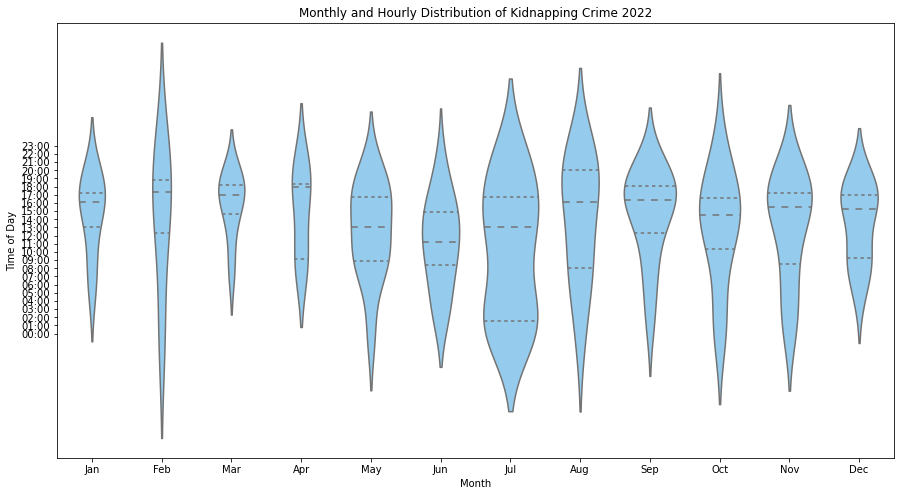

In [22]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'KIDNAPPING')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Kidnapping Crime 2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# HUMAN TRAFFICKING

<ipython-input-23-7607cd7992ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-23-7607cd7992ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-23-7607cd7992ec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

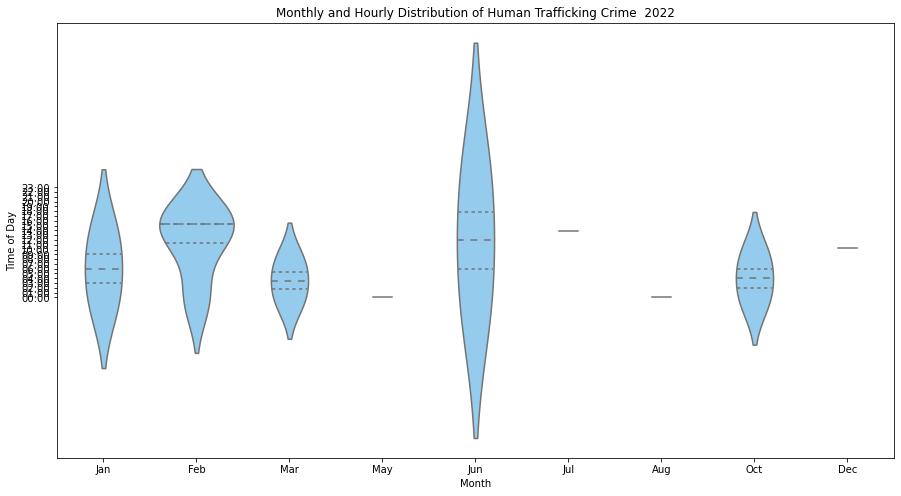

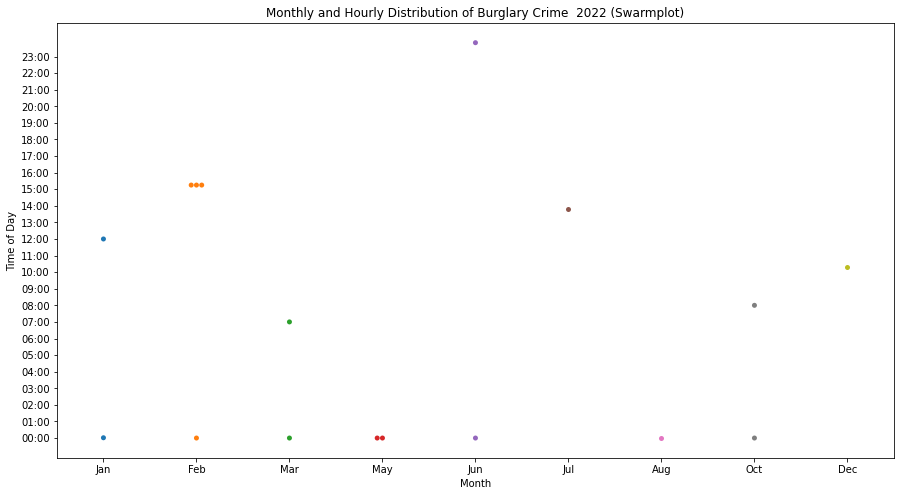

In [23]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'HUMAN TRAFFICKING')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Human Trafficking Crime  2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# Create the swarmplot
plt.figure(figsize=(15, 8))
sns.swarmplot(data=criminal_data, x='Month', y='Time', size=5)
plt.title('Monthly and Hourly Distribution of Burglary Crime  2022 (Swarmplot)')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# WEAPONS VIOLATION

<ipython-input-27-d53f9488e40f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-27-d53f9488e40f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-27-d53f9488e40f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

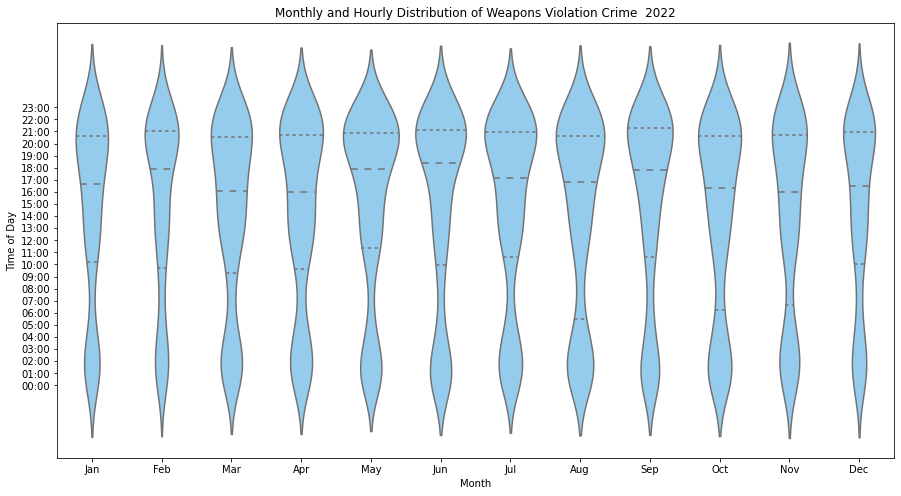

In [27]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'WEAPONS VIOLATION')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Weapons Violation Crime  2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# Create the swarmplot
# plt.figure(figsize=(15, 8))
# sns.swarmplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", size=5)
# plt.title('Monthly and Hourly Distribution of Weapons Violation Crime 2022 (Swarmplot)')
# plt.xlabel('Month')
# plt.ylabel('Time of Day')
# plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
# plt.show()

# STALKING

<ipython-input-26-666675468d9a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-26-666675468d9a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-26-666675468d9a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

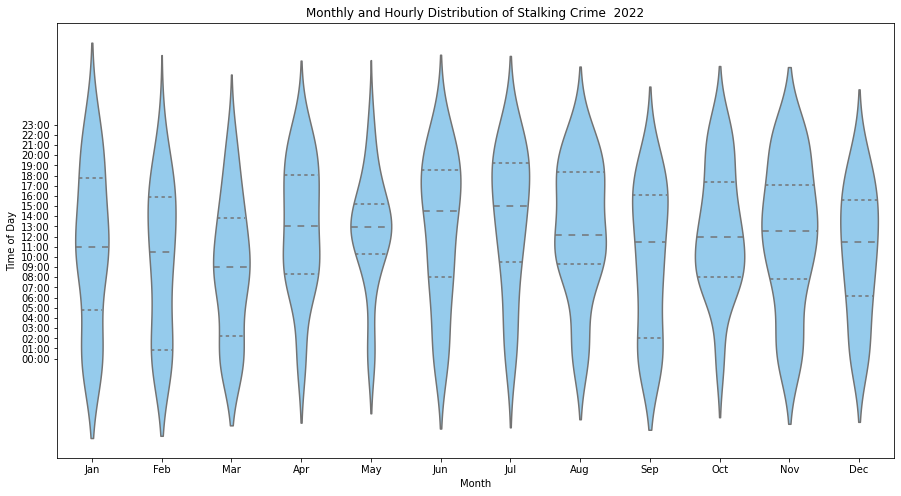

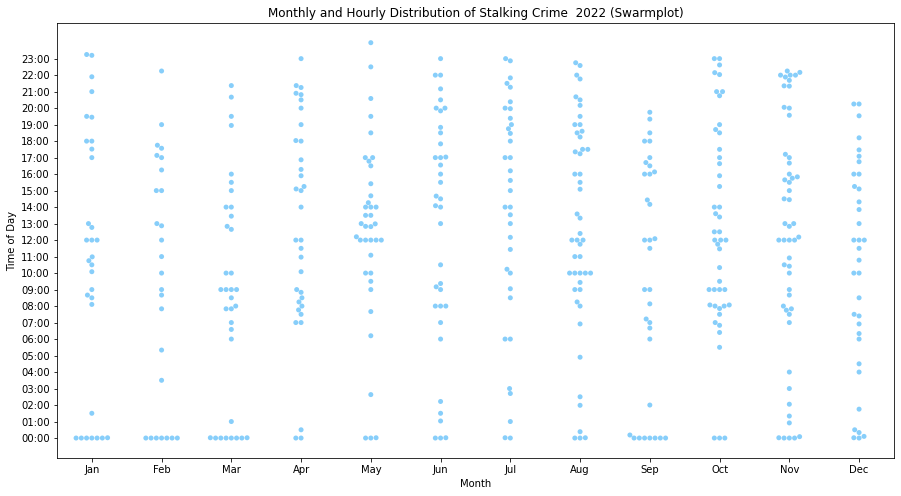

In [26]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'STALKING')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Stalking Crime  2022')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()


# Create the swarmplot
plt.figure(figsize=(15, 8))
sns.swarmplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", size=5)
plt.title('Monthly and Hourly Distribution of Stalking Crime  2022 (Swarmplot)')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

In [48]:
data['hour'] = pd.to_datetime(data['Date']).dt.hour

In [73]:
crime_types = data['Primary Type'].unique()
crime_types

array(['OFFENSE INVOLVING CHILDREN', 'DECEPTIVE PRACTICE',
       'CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE', 'WEAPONS VIOLATION',
       'THEFT', 'BATTERY', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'MOTOR VEHICLE THEFT', 'ASSAULT', 'OBSCENITY', 'STALKING',
       'BURGLARY', 'LIQUOR LAW VIOLATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL TRESPASS',
       'ROBBERY', 'ARSON', 'HOMICIDE', 'NARCOTICS',
       'PUBLIC PEACE VIOLATION', 'KIDNAPPING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'HUMAN TRAFFICKING', 'PROSTITUTION', 'OTHER NARCOTIC VIOLATION',
       'GAMBLING', 'NON-CRIMINAL', 'PUBLIC INDECENCY'], dtype=object)

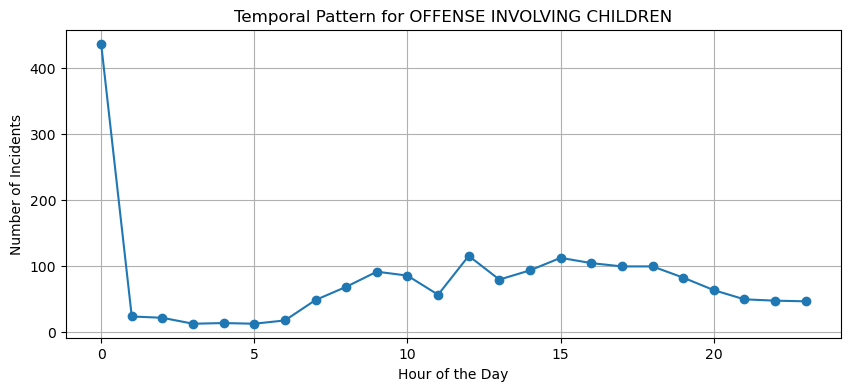

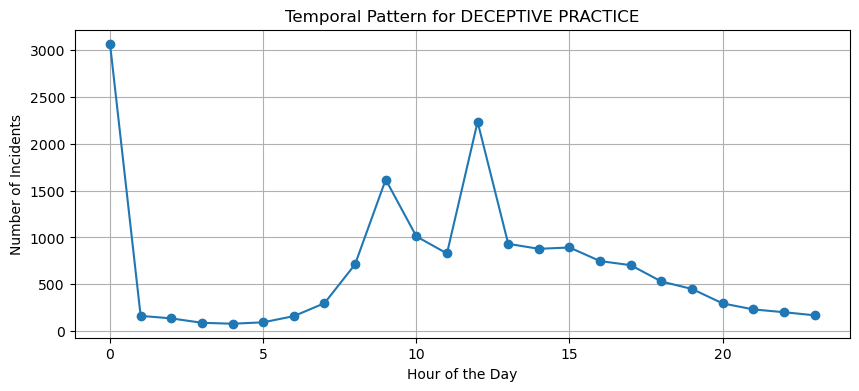

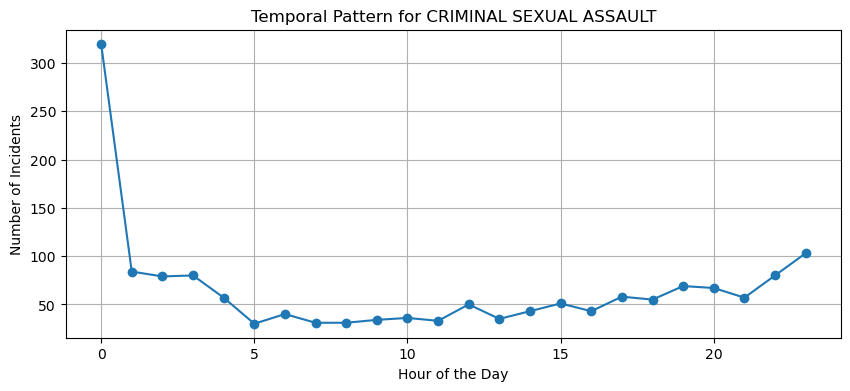

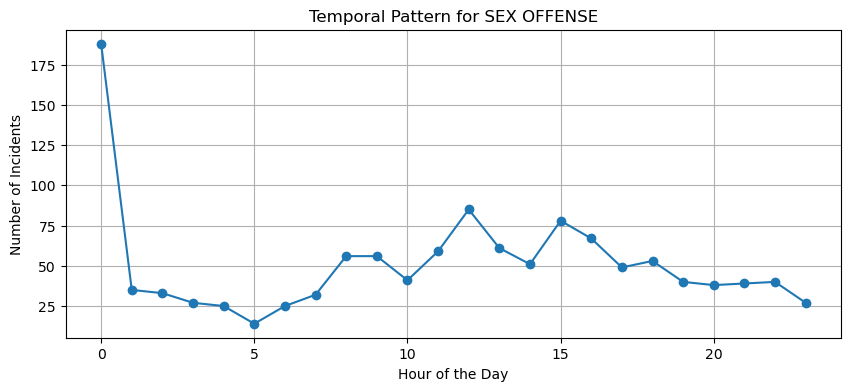

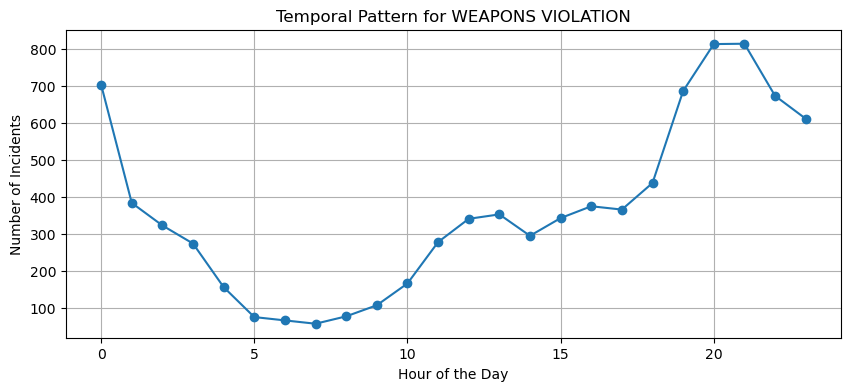

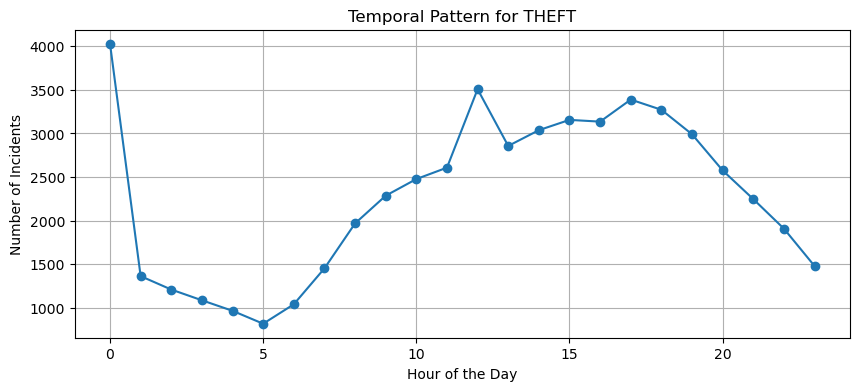

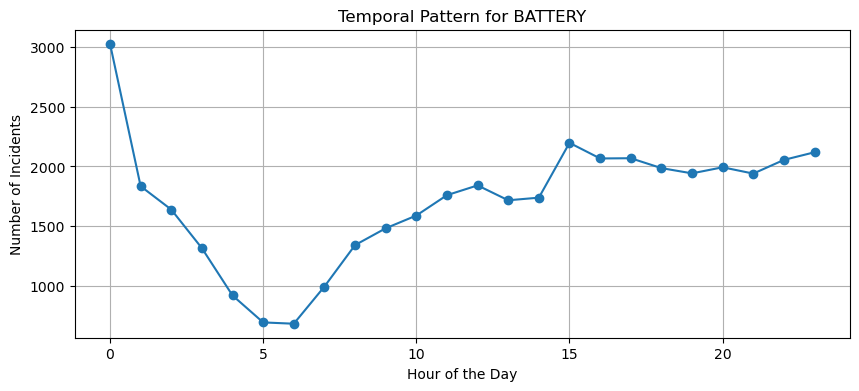

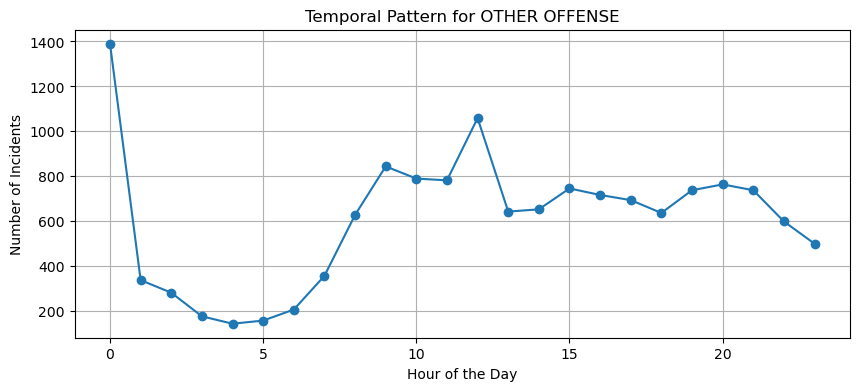

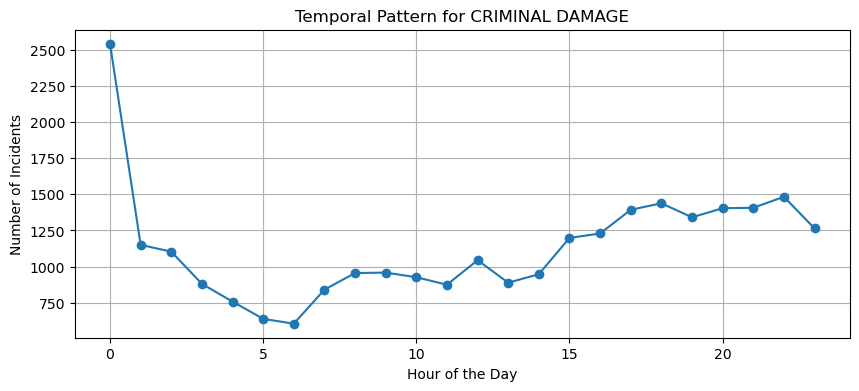

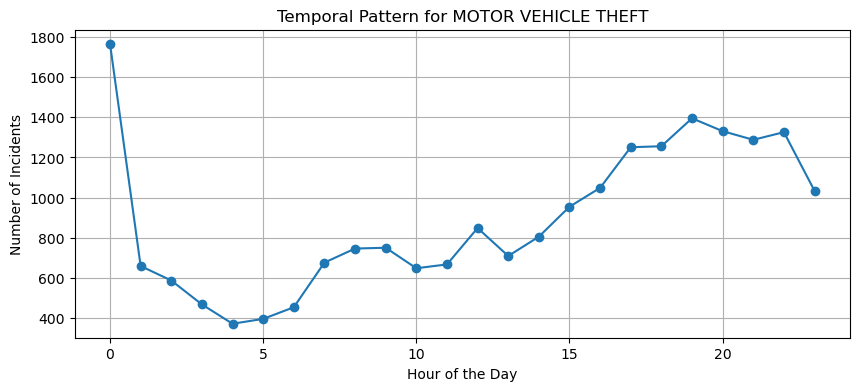

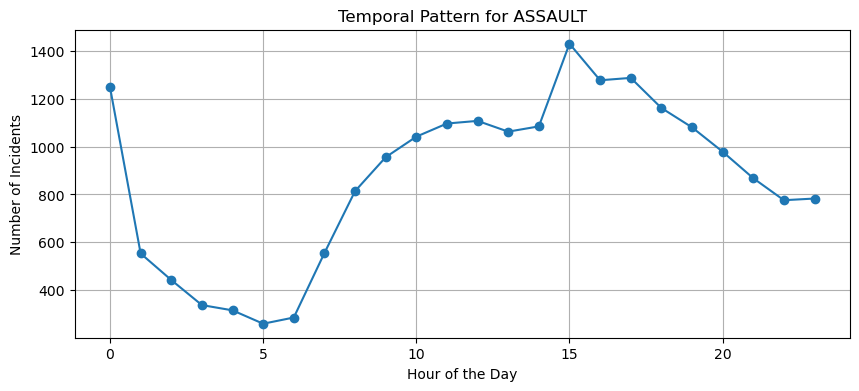

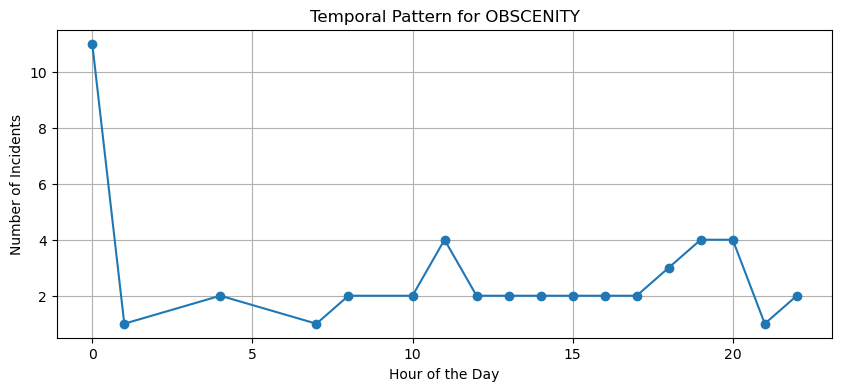

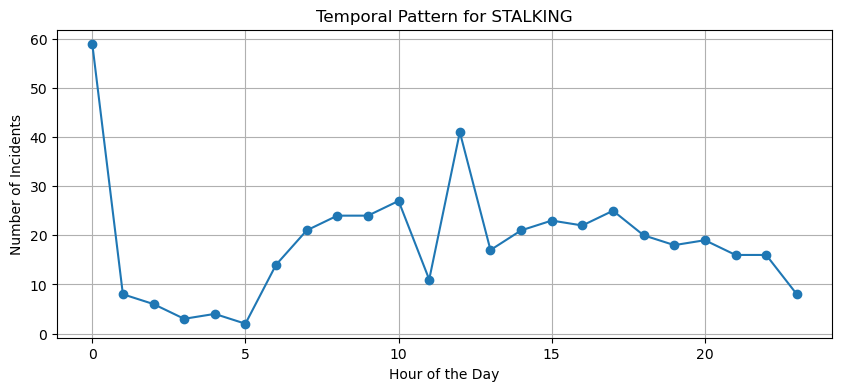

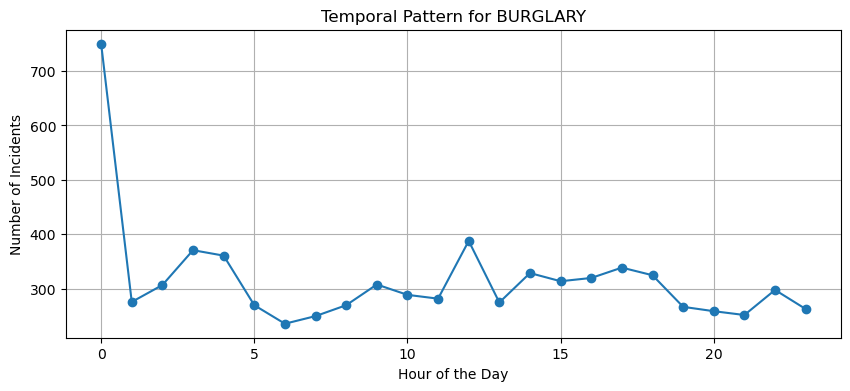

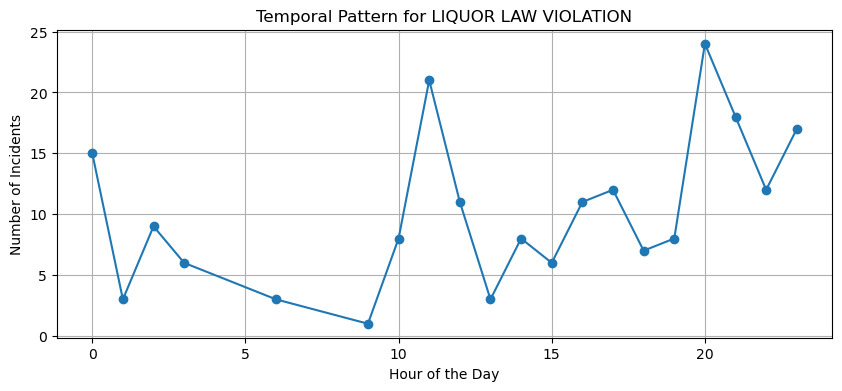

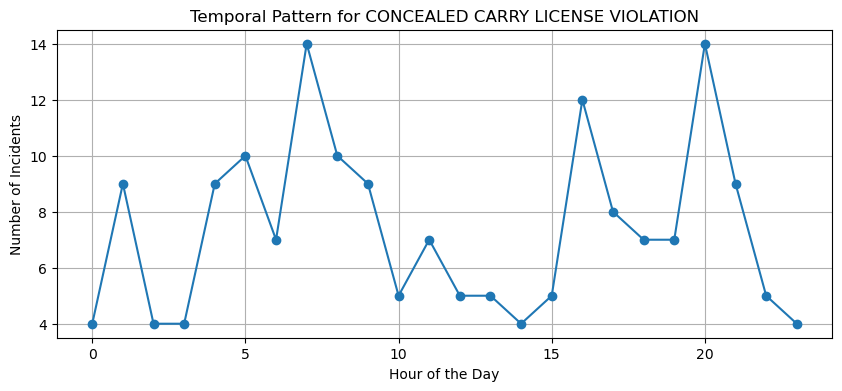

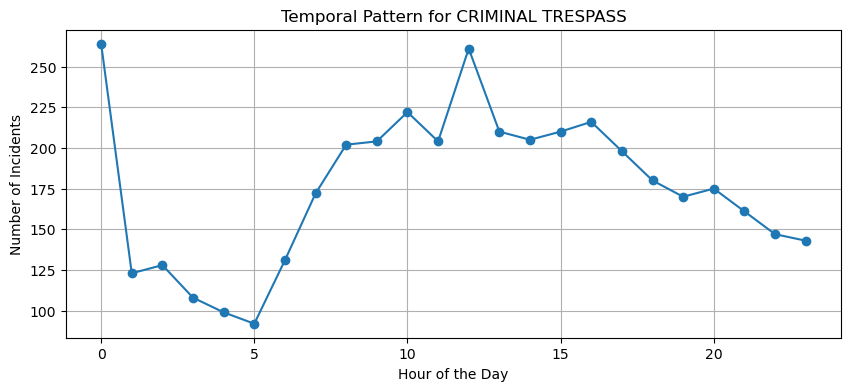

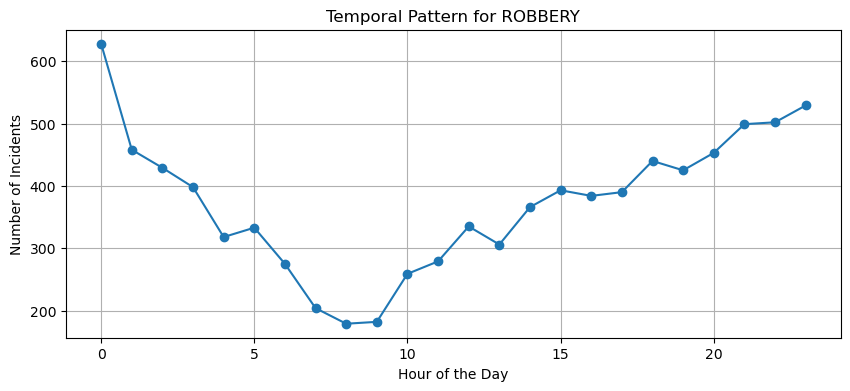

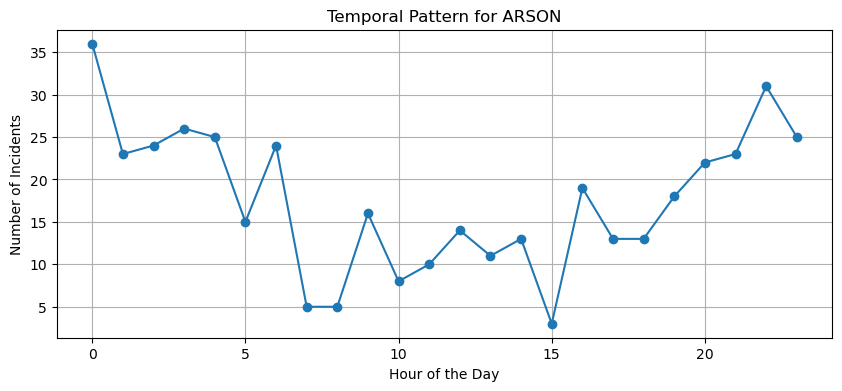

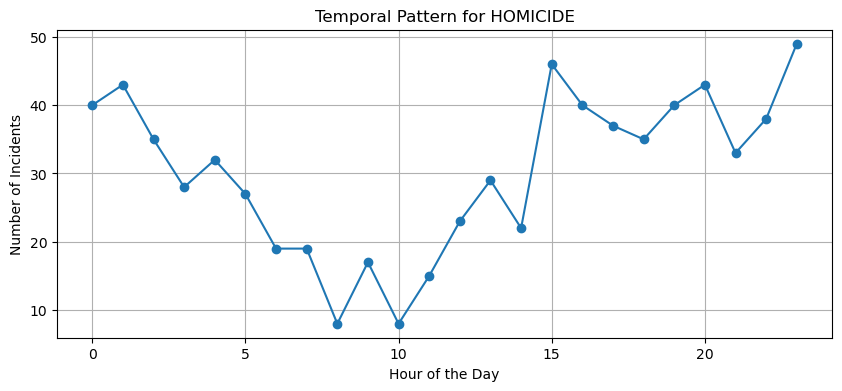

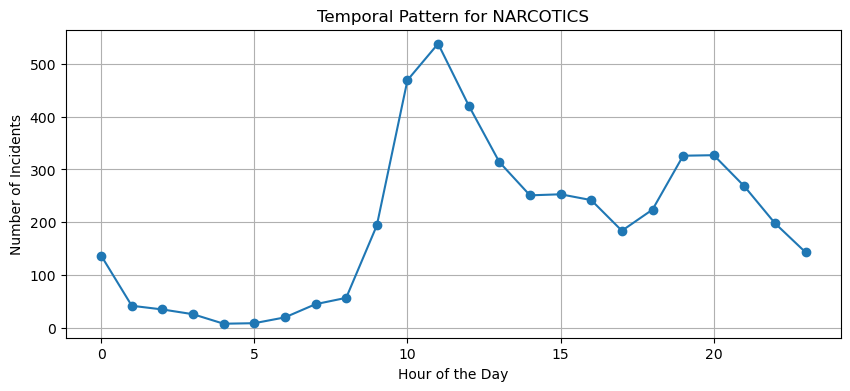

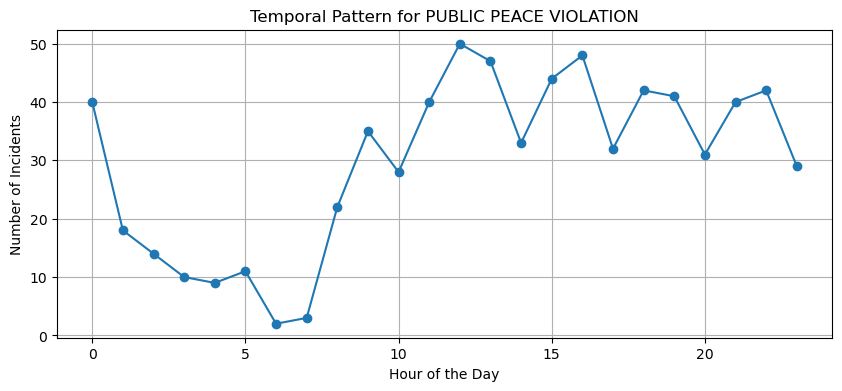

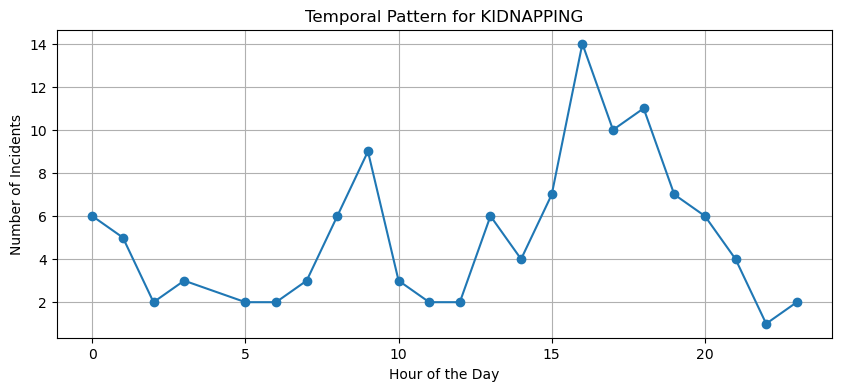

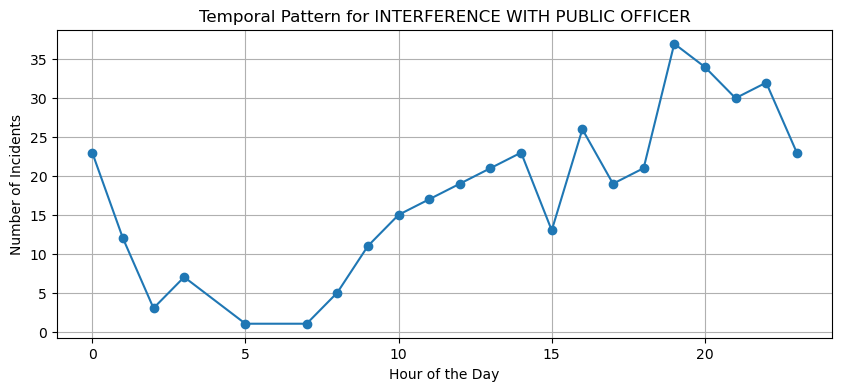

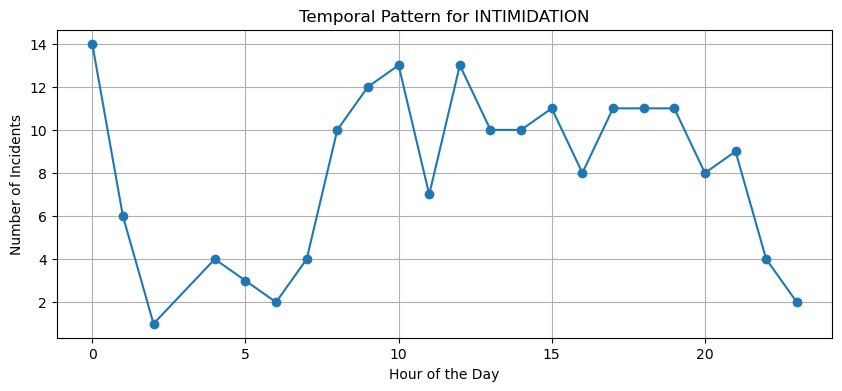

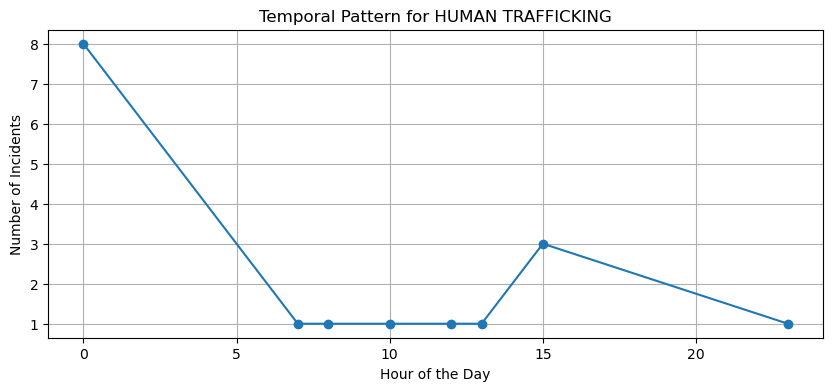

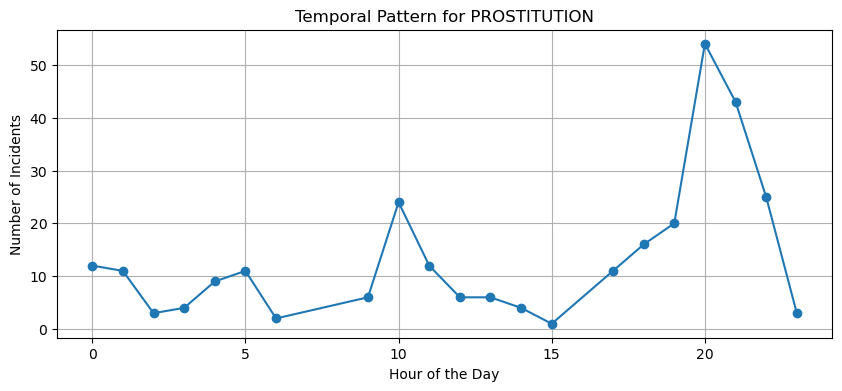

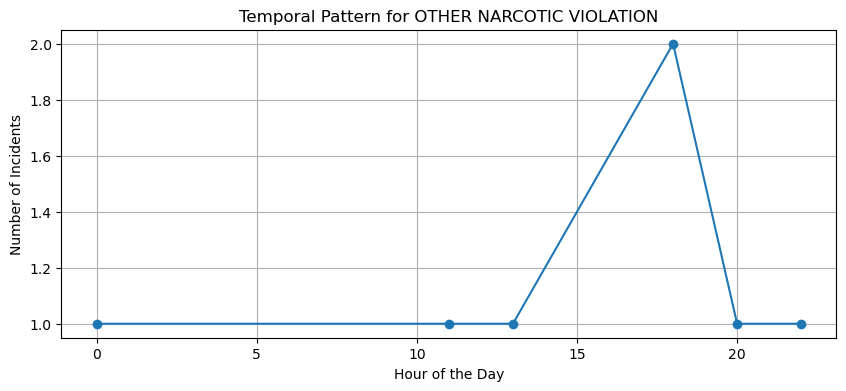

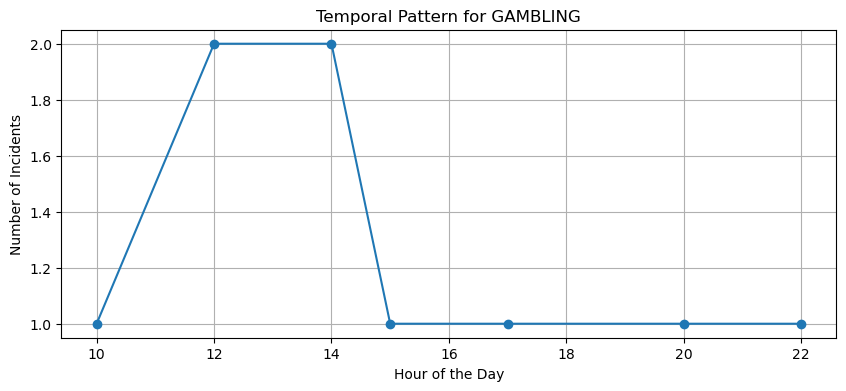

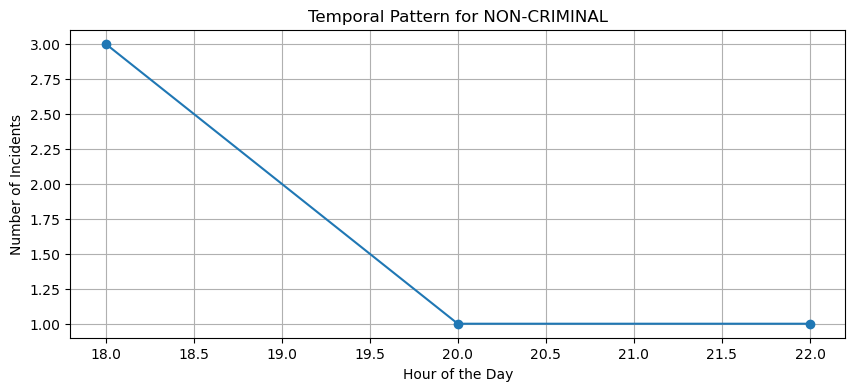

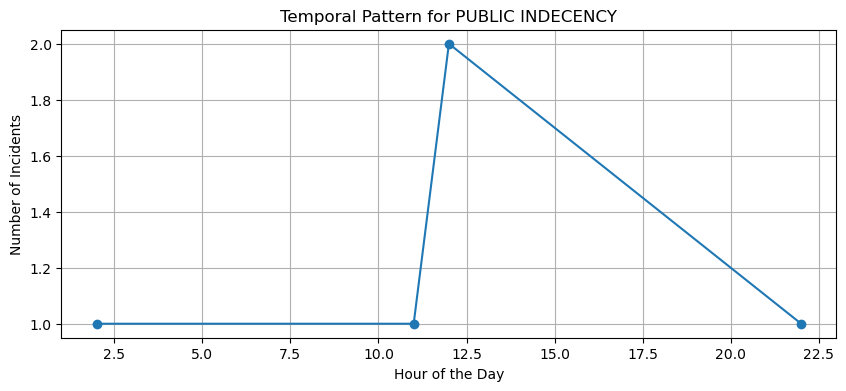

In [6]:
# Analyze temporal patterns for each crime type
for crime_type in crime_types:
    # Filter data for the specific crime type
    crime_data = data[data['Primary Type'] == crime_type]
    
    # Group data by the hour and count occurrences
    hourly_counts = crime_data['hour'].value_counts().sort_index()
    
    # Plot the temporal pattern
    plt.figure(figsize=(10, 4))
    plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
    plt.title(f"Temporal Pattern for {crime_type}")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Incidents")
    plt.grid(True)
    plt.show()

ValueError: num must be 1 <= num <= 8, not 9

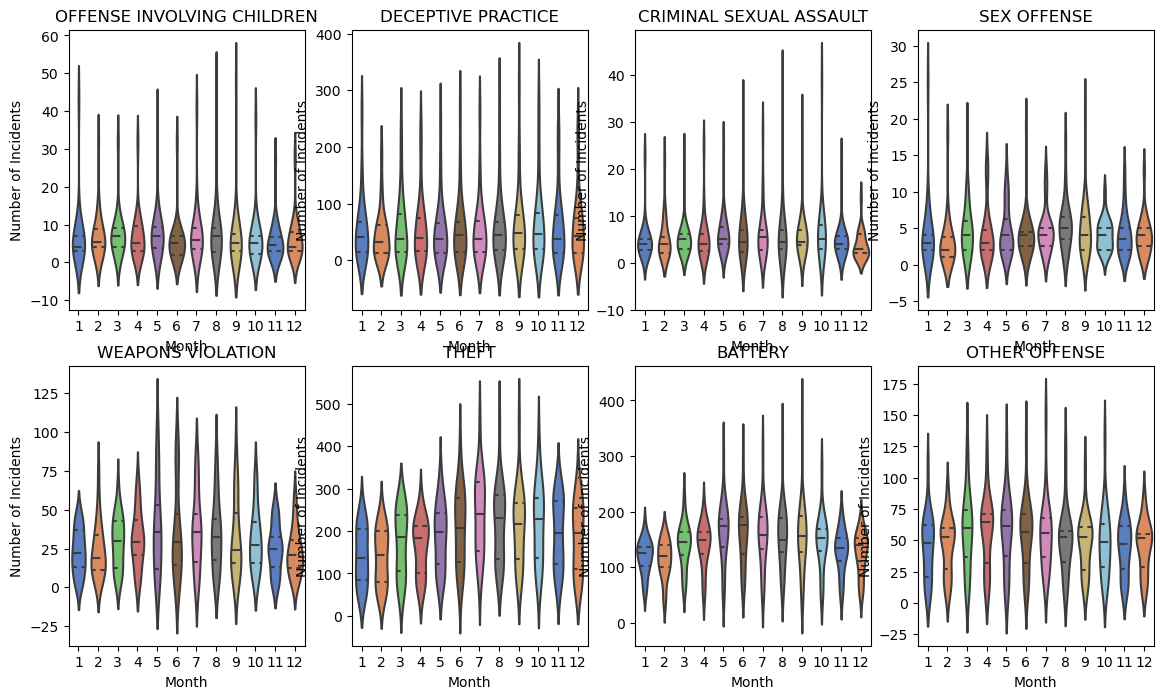

In [50]:
import seaborn as sns

# Parse the 'date' column to extract the month and hour
data['date'] = pd.to_datetime(data['Date'])
data['month'] = data['date'].dt.month
data['hour'] = data['date'].dt.hour

# Define a list of unique crime types
crime_types = data['Primary Type'].unique()

# Create a figure for the violin plot
plt.figure(figsize=(14, 8))

# Analyze temporal patterns for each crime type by month
for i, crime_type in enumerate(crime_types):
    # Filter data for the specific crime type
    crime_data = data[data['Primary Type'] == crime_type]
    
    # Group data by month, crime type, and hour and count occurrences
    hourly_counts = crime_data.groupby(['month', 'Primary Type', 'hour']).size().reset_index(name='count')
    
    # Create a violin plot for each crime type
    plt.subplot(2, 4, i + 1)
    sns.violinplot(data=hourly_counts, x='month', y='count', inner='quart', palette='muted')
    plt.title(f"{crime_type}")
    plt.xlabel("Month")
    plt.ylabel("Number of Incidents")

plt.tight_layout()
plt.show()